## Box-counting method

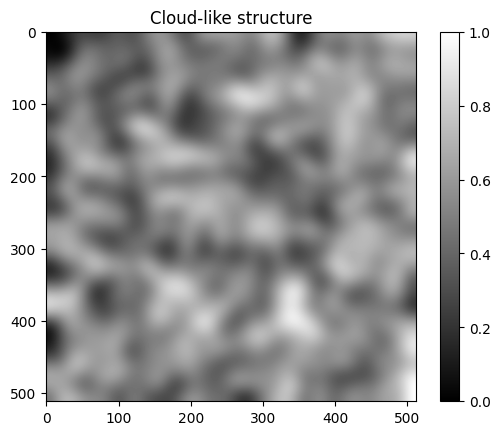

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Generate a cloud-like structure using random noise and smoothing
def generate_cloud(size=512, smoothness=10):
    # Create random noise
    noise = np.random.rand(size, size)
    
    # Smooth it to create a cloud-like structure
    cloud = gaussian_filter(noise, sigma=smoothness)
    
    # Normalize to [0, 1]
    cloud = (cloud - cloud.min()) / (cloud.max() - cloud.min())
    
    return cloud

# Generate the cloud and display it
cloud = generate_cloud(size=512, smoothness=15)

plt.imshow(cloud, cmap='gray')
plt.title('Cloud-like structure')
plt.colorbar()
plt.show()


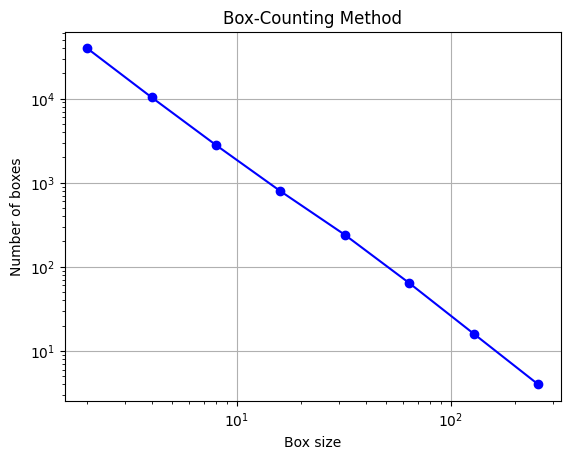

In [5]:
def box_count(image, box_size):
    """Count the number of non-empty boxes for a given box size."""
    # Get image dimensions
    N = len(image)
    
    # Resize the image so it can be divided exactly into (N/box_size) boxes
    reduced_size = N // box_size * box_size
    image_reduced = image[:reduced_size, :reduced_size]
    
    # Break the image into (box_size x box_size) boxes
    boxes = image_reduced.reshape((reduced_size // box_size, box_size,
                                   reduced_size // box_size, box_size))
    
    # Count boxes that have non-zero values (part of the structure)
    non_empty_boxes = np.sum(np.any(np.any(boxes > 0, axis=-1), axis=1))
    
    return non_empty_boxes

# Apply box counting for different box sizes
def fractal_dimension_box_counting(image, min_box_size=2, max_box_size=None):
    if max_box_size is None:
        max_box_size = image.shape[0] // 2  # Avoid box size larger than half of the image
    
    box_sizes = []
    counts = []
    
    box_size = min_box_size
    while box_size <= max_box_size:
        box_sizes.append(box_size)
        counts.append(box_count(image, box_size))
        box_size *= 2  # Double the box size each iteration
        
    return np.array(box_sizes), np.array(counts)

# Binarize the cloud to create a clear structure (thresholding)
cloud_binary = cloud > 0.5

# Calculate the fractal dimension using box-counting
box_sizes, counts = fractal_dimension_box_counting(cloud_binary)

# Plot log-log to estimate the fractal dimension
plt.loglog(box_sizes, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Box size')
plt.ylabel('Number of boxes')
plt.title('Box-Counting Method')
plt.grid(True)
plt.show()


In [6]:
from scipy.stats import linregress

# Perform linear regression in log-log space
log_box_sizes = np.log(box_sizes)
log_counts = np.log(counts)

slope, intercept, r_value, p_value, std_err = linregress(log_box_sizes, log_counts)

# The fractal dimension is the negative slope
fractal_dimension = -slope
print(f"Estimated Fractal Dimension: {fractal_dimension:.2f}")


Estimated Fractal Dimension: 1.88
